In [ ]:
from keras.models import Sequential, load_model
from keras import layers
from keras.optimizers import Adam
from keras.activations import relu, softmax
from keras.losses import categorical_crossentropy
from keras.applications import VGG19, RegNetX032
from keras.preprocessing.image import ImageDataGenerator
from keras.src.callbacks import History, EarlyStopping, ModelCheckpoint

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
DATASET_PATH: str = '/content/drive/MyDrive/datasets/Akhund and Human'
INPUT_SHAPE: tuple[int, int, int] = (244, 244, 3)
EPOCHS: int = 30
MODEL_SAVE_PATH: str = f'/content/drive/MyDrive/Akhund_and_Human_{EPOCHS}ep.keras'

## Load The Dataset

In [ ]:
idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

train_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    batch_size=32,
    subset='training'
)

validation_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    batch_size=32,
    subset='validation'
)

Found 374 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


## Traning Part

In [ ]:
regnet = RegNetX032(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
regnet.summary()

In [ ]:
len(regnet.layers)

263

In [ ]:
for layer in regnet.layers[:7]:
    print(layer.name)
    layer.trainable = False

input_1
regnetx032_prestem_rescaling
regnetx032_stem_conv
regnetx032_stem_bn
regnetx032_stem_relu
regnetx032_Stage_0_XBlock_0_conv_1x1_1
regnetx032_Stage_0_XBlock_0_conv_1x1_1_bn


In [ ]:
model: Sequential = Sequential([
    regnet,

    layers.Flatten(),
    # layers.Dense(256, relu),
    # layers.Dropout(.2),

    layers.Dense(125, relu),
    layers.Dropout(.2),

    layers.Dense(2, softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx032 (Functional)     (None, 8, 8, 1008)        14350112  
                                                                 
 flatten (Flatten)           (None, 64512)             0         
                                                                 
 dense (Dense)               (None, 125)               8064125   
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 252       
                                                                 
Total params: 22414489 (85.50 MB)
Trainable params: 22347737 (85.25 MB)
Non-trainable params: 66752 (260.75 KB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(MODEL_SAVE_PATH, save_best_only=True)
stop = EarlyStopping(patience=7)

In [ ]:
history: History = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS,
    callbacks=[stop, checkpoint]
)

Epoch 1/30
12/12 [==============================] - 157s 5s/step - loss: 3.7061 - accuracy: 0.7487 - val_loss: 4.3187 - val_accuracy: 0.5326
Epoch 2/30
12/12 [==============================] - 18s 1s/step - loss: 1.6656 - accuracy: 0.8690 - val_loss: 3.9846 - val_accuracy: 0.5326
Epoch 3/30
12/12 [==============================] - 18s 1s/step - loss: 0.7590 - accuracy: 0.8824 - val_loss: 1.7570 - val_accuracy: 0.5326
Epoch 4/30
12/12 [==============================] - 20s 2s/step - loss: 0.3483 - accuracy: 0.9278 - val_loss: 0.6967 - val_accuracy: 0.5326
Epoch 5/30
12/12 [==============================] - 15s 1s/step - loss: 0.1965 - accuracy: 0.9225 - val_loss: 1.6027 - val_accuracy: 0.5326
Epoch 6/30
12/12 [==============================] - 16s 1s/step - loss: 0.1179 - accuracy: 0.9652 - val_loss: 0.1587 - val_accuracy: 0.9348
Epoch 7/30
12/12 [==============================] - 14s 1s/step - loss: 0.0476 - accuracy: 0.9813 - val_loss: 0.4661 - val_accuracy: 0.8696
Epoch 8/30
12/12 [=

In [ ]:
model: Sequential = load_model(MODEL_SAVE_PATH)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx032 (Functional)     (None, 8, 8, 1008)        14350112  
                                                                 
 flatten (Flatten)           (None, 64512)             0         
                                                                 
 dense (Dense)               (None, 125)               8064125   
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 252       
                                                                 
Total params: 22414489 (85.50 MB)
Trainable params: 22347737 (85.25 MB)
Non-trainable params: 66752 (260.75 KB)
_________________________________________________________________


In [ ]:
model.evaluate(validation_dataset)

3/3 [==============================] - 10s 977ms/step - loss: 0.1910 - accuracy: 0.9022


[0.19096992909908295, 0.9021739363670349]

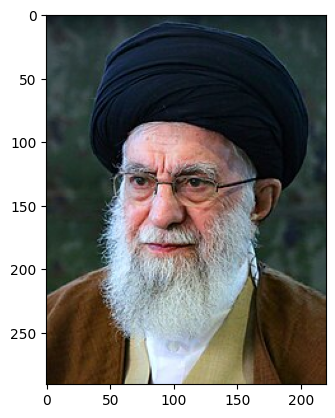

In [ ]:
img = cv.imread('/content/drive/MyDrive/images/Ali_Khamenei_at_IRGC_Aerospace_Force_2023.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
img = cv.resize(img, INPUT_SHAPE[:2])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.array(img) / 255
img = np.expand_dims(img, axis=0)

In [ ]:
prediction = np.argmax(model.predict(img))
if prediction == 0:
  print('Akhund')
elif prediction == 1:
  print('Human')

1/1 [==============================] - 8s 8s/step
Akhund


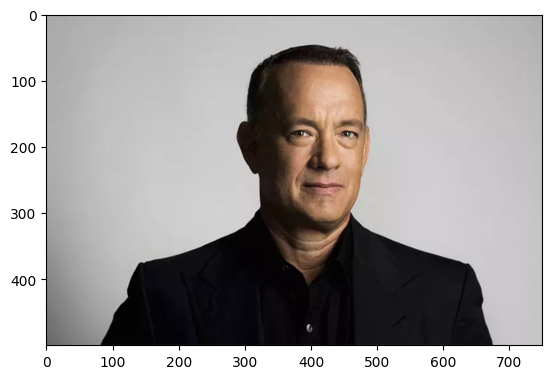

In [ ]:
img = cv.imread('/content/drive/MyDrive/images/TomHanks.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
img = cv.resize(img, INPUT_SHAPE[:2])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.array(img) / 255
img = np.expand_dims(img, axis=0)

In [ ]:
prediction = np.argmax(model.predict(img))
if prediction == 0:
  print('Akhund')
elif prediction == 1:
  print('Human')

1/1 [==============================] - 0s 31ms/step
Human


## Bot

In [ ]:
!pip install telebot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.15.3-py3-none-any.whl size=231699 sha256=460b38a739d26cb41019aa89b21ee6b6086a1fb27cc0763309f0e4b59eaa32a0
  Stored in directory: /root/.cache/pip/wheels/8b/91/89/03c9aae3d154729ba911d9b0974ceb84268b2cc63130e63ba3
Successfully built pyTelegramBotAPI


In [ ]:
import telebot
from telebot.types import Message
from keras.models import Sequential, load_model
import numpy as np
import cv2 as cv

In [ ]:
bot = telebot.TeleBot('token', parse_mode=None)
IS_IMG: bool = False


@bot.message_handler(commands=['start'])
def send_welcome(message: Message):
    bot.reply_to(
        message, f'سلام {message.from_user.first_name} خوبی؟')
    bot.send_message(
        message.chat.id, 'من ربات متنیم. یک عکس از یک آخوند یا یک آدم برام بفرست')


@bot.message_handler(commands=['help'])
def send_help(message: Message):
    bot.send_message(message.chat.id, 'اول /image بزن بعدش عکس رو بفرست')


@bot.message_handler(commands=['image'])
def get_img(message: Message):
    global IS_IMG
    IS_IMG = True
    bot.send_message(message.chat.id, 'یک عکس برام بفرست')
enumerate

@bot.message_handler(content_types=["photo"])
def photo(message: Message):
    global IS_IMG, model
    if IS_IMG:
        info = bot.get_file(
            message.photo[len(message.photo) - 1].file_id
        )
        user_img = bot.download_file(info.file_path)
        with open('Akhund_or_Human.jpg', 'wb') as file:
            file.write(user_img)

        user_image = cv.imread('Akhund_or_Human.jpg')
        user_image = cv.resize(user_image, INPUT_SHAPE[:2])
        user_image = cv.cvtColor(user_image, cv.COLOR_BGR2RGB)
        user_image = user_image / 255.

        prediction = np.argmax(model.predict(np.expand_dims(user_image, axis=0)))

        bot.send_message(
            message.chat.id, 'از ما نیست' if prediction == 0 else 'از ماست'
        )
        IS_IMG = False

bot.infinity_polling()